#### LOAD DASET

In [1]:
# import MNB
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from multinomial import MultinomialNB # 81%

import tfidf as tfidf

#### Load Dataset 9:1

In [2]:
# load dataset with pickle
with open('./PICKLE/Dataset - Clean - 91 - Test - TFIDF.pkl', 'rb') as f:
    df_test_91 = pickle.load(f)  

with open('./PICKLE/Dataset - Clean - 91 - Train - TFIDF.pkl', 'rb') as f:
    df_train_91 = pickle.load(f)

In [3]:
df_test_91.head(5)

,content,label,label_id,text_preprocess,tfidf
0,This is a very bad apps for concert ticket sel...,0,unhappy,bad apps concert ticket selling really bad sel...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,how to operate less simple,1,satisfied,operate le simple,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,why difficult to book,0,unhappy,difficult book,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,one of the best apps,1,satisfied,one best apps,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"easy and fast, getting better everyday",1,satisfied,easy fast getting better everyday,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


#### Data Exploration

In [7]:
# Filter dataset untuk mendapatkan subset data untuk setiap kelas
df_satisfied = df_train_91[df_train_91['label_id'] == 'satisfied']
df_unhappy = df_train_91[df_train_91['label_id'] == 'unhappy']

# Menghitung TF-IDF untuk setiap subset data
tfidf_satisfied = tfidf.TFIDF(df_satisfied['text_preprocess'])
tfidf_unhappy = tfidf.TFIDF(df_unhappy['text_preprocess'])

# Dapatkan top words dari setiap subset data
top_words_satisfied = tfidf_satisfied.getTopWordFromAll(n=10)
top_words_unhappy = tfidf_unhappy.getTopWordFromAll(n=10)

In [4]:
# count_word_satisfied = tfidf_satisfied.create_word_count_list

In [5]:
# # Mendapatkan kata-kata dengan nilai TF-IDF 0 untuk kelas 'satisfied'
# zero_tfidf_words_satisfied = tfidf_satisfied.getZeroTfidfWord()
# print("Kata-kata dengan nilai TF-IDF 0 untuk kelas 'satisfied':", zero_tfidf_words_satisfied)

# # Mendapatkan kata-kata dengan nilai TF-IDF 0 untuk kelas 'unhappy'
# zero_tfidf_words_unhappy = tfidf_unhappy.getZeroTfidfWord()
# print("Kata-kata dengan nilai TF-IDF 0 untuk kelas 'unhappy':", zero_tfidf_words_unhappy)

In [9]:
# Tampilkan hasil
print("Top 10 words for 'satisfied' class:")
for i, word_info in enumerate(top_words_satisfied):
    print(f"{i+1}. Kata: {word_info['Kata']}, Average Score: {word_info['Score']}")

print("\nTop 10 words for 'unhappy' class:")
for i, word_info in enumerate(top_words_unhappy):
    print(f"{i+1}. Kata: {word_info['Kata']}, Average Score: {word_info['Score']}")

df_top_words_satisfied = pd.DataFrame(top_words_satisfied)
df_top_words_unhappy = pd.DataFrame(top_words_unhappy)

# save top words to csv
# df_top_words_satisfied.to_csv('./CSV/top_words_satisfied.csv', index=False)
# df_top_words_unhappy.to_csv('./CSV/top_words_unhappy.csv', index=False)

Top 10 words for 'satisfied' class:
1. Kata: good, Average Score: 0.08919496726207608
2. Kata: easy, Average Score: 0.06469564255768578
3. Kata: nice, Average Score: 0.052334565175624785
4. Kata: app, Average Score: 0.04924581592913003
5. Kata: simple, Average Score: 0.042454456028898795
6. Kata: use, Average Score: 0.040678239537315516
7. Kata: price, Average Score: 0.0396620361740611
8. Kata: apps, Average Score: 0.03752463418070747
9. Kata: fast, Average Score: 0.03654175720096265
10. Kata: helpful, Average Score: 0.03638511904039393

Top 10 words for 'unhappy' class:
1. Kata: price, Average Score: 0.030452525053565316
2. Kata: cant, Average Score: 0.028797184628777773
3. Kata: app, Average Score: 0.02710454004408829
4. Kata: ticket, Average Score: 0.026970649624948502
5. Kata: error, Average Score: 0.026372283049260554
6. Kata: slow, Average Score: 0.0225428060633906
7. Kata: hotel, Average Score: 0.022321296474116816
8. Kata: payment, Average Score: 0.022096670668128867
9. Kata: a

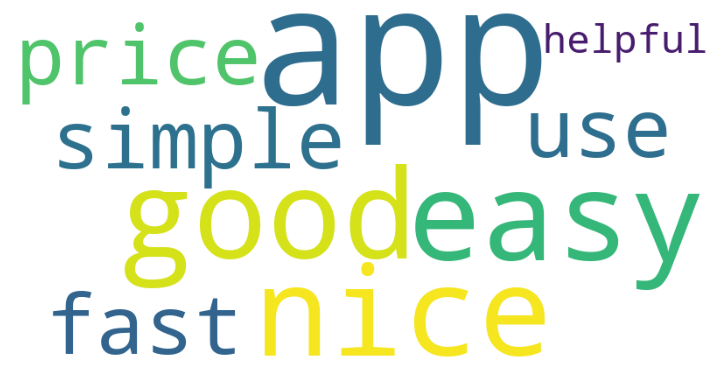

In [54]:
# word cloud for top words satisfied
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(df_top_words_satisfied['Kata']))

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

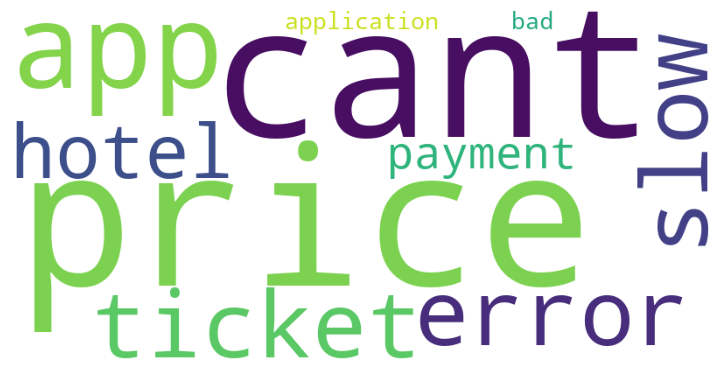

In [63]:
# word cloud for top words satisfied
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(df_top_words_unhappy['Kata']))

plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [6]:
# hitung berapa jumlah kalimat yang terdapat pada kelas satisfied dan unhappy
def count_class(df):
    class_count = df['label'].value_counts()
    return class_count

# hitung jumlah kalimat pada masing-masing kelas
train_class_count = count_class(df_train_91)
test_class_count = count_class(df_test_91)

train_class_count, test_class_count

(1    619
 0    586
 Name: label, dtype: int64,
 1    69
 0    65
 Name: label, dtype: int64)

#### Train 

In [4]:
# initialize MNB
mnb = MultinomialNB()
X_train = np.vstack(df_train_91['tfidf'].to_numpy())
y_train = df_train_91['label_id'].to_numpy()

X_test = df_test_91['tfidf']
y_test = df_test_91['label_id']

# fit MNB
mnb.fit(X_train, y_train)

# predict
y_pred = mnb.predict(X_test) 

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Model: ', accuracy)

Accuracy Model:  0.8134328358208955


#### K-Fold

In [10]:
# K-V Cross Validation
from sklearn.model_selection import KFold

# initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize MNB
mnb = MultinomialNB()

# initialize list to store accuracy
acc_list = []

# loop for each fold
for train_index, test_index in kf.split(X_train):
    # split data
    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

    # fit MNB
    mnb.fit(X_train_kf, y_train_kf)

    # predict
    y_pred_kf = mnb.predict(X_test_kf)

    # accuracy
    acc = accuracy_score(y_test_kf, y_pred_kf)
    acc_list.append(acc)

# calculate average accuracy
avg_acc = np.mean(acc_list)
print('Average Accuracy Model: ', avg_acc)


Average Accuracy Model:  0.812448132780083


In [37]:
# K-Fold Cross Validation with TF-IDF
from sklearn.model_selection import KFold

# initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize MNB
mnb = MultinomialNB()

# initialize list to store accuracy
acc_list = []

# loop for each fold
for train_index, test_index in kf.split(X_train):
    # split data
    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]

    # fit MNB
    mnb.fit(X_train_kf, y_train_kf)

    # predict
    y_pred_kf = mnb.predict(X_test_kf)

    # accuracy
    acc = accuracy_score(y_test_kf, y_pred_kf)
    acc_list.append(acc)

# calculate average accuracy
avg_acc = np.mean(acc_list)
print('Average Accuracy Model: ', avg_acc)

Average Accuracy Model:  0.812448132780083


In [31]:
# metrics of the model
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

accuracy, precision, recall, f1

(0.8134328358208955, 0.8147321428571428, 0.81438127090301, 0.8134224450013924)

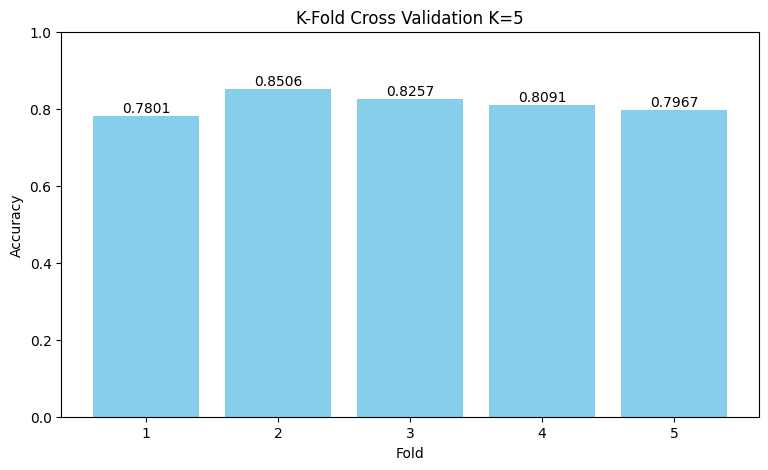

In [36]:
# Display K-Fold Cross Validation with diagram bar
plt.figure(figsize=(9, 5))
plt.bar(range(1, 6), acc_list, color='skyblue')

# add accuracy value on each bar
for i, acc in enumerate(acc_list):
    plt.text(i+1, acc+0.01, round(acc, 4), ha='center', color='black')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation K=5')
plt.yticks(np.arange(0, 1.1, 0.2))
plt.show()


#### Compare Result 

In [12]:
content = df_test_91['content']
compare = pd.DataFrame({'Content':content,'Actual': y_test, 'Predicted': y_pred})
compare['Correct'] = np.where(compare['Actual'] == compare['Predicted'], 1, 0) # 
compare.head(5)

,Content,Actual,Predicted,Correct
0,This is a very bad apps for concert ticket sel...,unhappy,unhappy,1
1,how to operate less simple,satisfied,satisfied,1
2,why difficult to book,unhappy,unhappy,1
3,one of the best apps,satisfied,satisfied,1
4,"easy and fast, getting better everyday",satisfied,satisfied,1


In [9]:
# save compare to csv
# compare.to_csv('./CSV/Compare - 91 - MultinomialNB - TFIDF.csv', index=False)

#### Confusionn Matrix

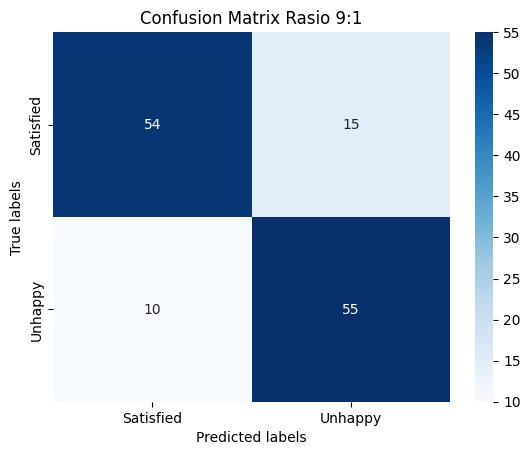

In [37]:
# confusion matrix with good format
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
ax.set_title('Confusion Matrix Rasio 9:1')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.xaxis.set_ticklabels(['Satisfied', 'Unhappy'])
ax.yaxis.set_ticklabels(['Satisfied', 'Unhappy'])

plt.show()


In [38]:
# metrics of the model
from sklearn.metrics import precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

accuracy, precision, recall, f1

(0.8134328358208955, 0.8147321428571428, 0.81438127090301, 0.8134224450013924)

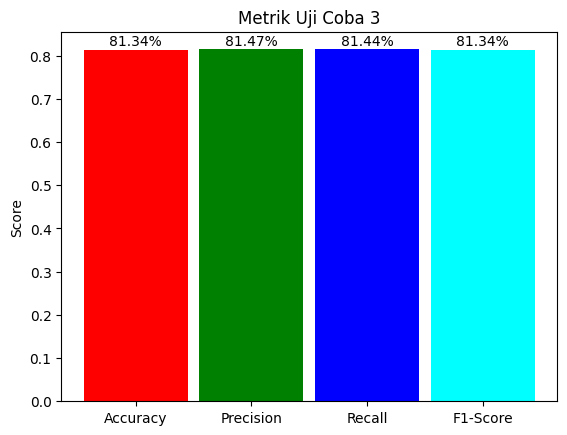

In [39]:
def plot_metrics(accuracy, precision, recall, f1):
    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [accuracy, precision, recall, f1]

    x = np.arange(len(labels))
    width = 0.9 # Increase the width to make the bars thicker

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, values, width, color=['red', 'green', 'blue', 'cyan'])  # Add different colors for each bar

    ax.set_ylabel('Score')
    ax.set_title('Metrik Uji Coba 3')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    # Add the values on top of each bar
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.2%}', ha='center') # 

    plt.show()

plot_metrics(accuracy, precision, recall, f1)

In [8]:
# visualize the result
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Satisfied', 'Unhappy']))


              precision    recall  f1-score   support

   Satisfied       0.84      0.78      0.81        69
     Unhappy       0.79      0.85      0.81        65

    accuracy                           0.81       134
   macro avg       0.81      0.81      0.81       134
weighted avg       0.82      0.81      0.81       134

